In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#from degree_betweenness import *
import pandas as pd
import networkx.algorithms.community as community3
from networkx.algorithms.community import louvain_partitions
import matplotlib.cm as cm
#import community
import community.community_louvain as community_louvain
from networkx.algorithms.community import girvan_newman
import community as cmm
import copy

In [2]:
path = "./chess_data_2020.csv"
path_to_save = "./nx_saved.jpg"

def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

def create_network_from_dataframe(df, source, target): #ritorna il network creato partendo da un df pulito
   G = nx.from_pandas_edgelist(df, source, target)
   return G

def draw_and_save_network(G,node_size,with_labels,path_to_save): #visualizza e salva in locale un network, prende G, la node-size e un bool se vogliamo mettere o no i labels e il percorso-nome in cui salvare
   fig = nx.draw(G, node_size=node_size, with_labels = with_labels)
   plt.savefig(path_to_save)


df = clean_dataframe(path)
#print(df)

#bip = create_network_from_dataframe(df, )

def save_first3(dataframe):
    new_name = []
    for i in dataframe["Opening"].values:
        
        new_name.append(str(i)[:3])
    
    dataframe = dataframe.drop("Opening", axis=1)
    dataframe.insert(4, "ECO", new_name, False)
    return dataframe



new_df = save_first3(df)
new_df=new_df.dropna()

list_players_white=new_df['White'].values
list_players_black=new_df['Black'].values
list_players_full=list_players_white+list_players_black
unique_players=[]
for i in list_players_white:
    unique_players.append(i)
for i in list_players_black:
    unique_players.append(i)
unique_players=[*set(unique_players)]

graph = nx.Graph()

# Add nodes from the 'white' and 'black' columns
graph.add_nodes_from(new_df['White'], bipartite=0)
graph.add_nodes_from(new_df['Black'], bipartite=1)

# Add edges connecting 'white' and 'opening' nodes
white_opening_edges = [(row['White'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(white_opening_edges)

# Add edges connecting 'black' and 'opening' nodes
black_opening_edges = [(row['Black'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(black_opening_edges)

# Project the bipartite graph onto the 'opening' nodes
players_graph = nx.bipartite.weighted_projected_graph(graph, unique_players, ratio=True)
print('players graph created')
#pos = nx.spring_layout(players_graph)
#nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
#plt.axis('off')
graph_louvain = community3.louvain_communities(players_graph)
partitions = community_louvain.best_partition(players_graph)
print(partitions)


##### QUI STIAMO SALVANDO IN CSV IL DICTONARY CHE HA AD OGNI COMMUNITY, IL O I PLAYERS ASSOCIATI;
### CHE POI MANIPOLEREMO PER CAPIRE QUALI GIOCATORI SONO IN QUALE COMMUNITY
#path2save = '/Users/francescoaldoventurelli/Desktop/codici_CN/'
#name = 'community_players_LOVAIN_dict.csv'
#save_dict = pd.DataFrame.from_dict(partitions, columns=[])
#save_dict.to_csv(path2save+name)

players graph created
{'Florstedt, J': 5, 'Higatsberger, M': 5, 'Miranda Llanes, Y': 3, 'Bezgodov, A': 5, 'Kokje, J': 2, 'Haubro, M': 2, 'Kosteniuk, O': 2, 'Ustianovich, N': 1, 'Aharonovich, I': 2, 'Sierra Montoya, M': 5, 'Perez Garcia, R': 5, 'Silich, Y': 5, 'Hjartarson, J': 3, 'Gevorgyan, I': 3, 'Carlsson, L': 2, 'Nguyen Thi Mai Hung,': 0, 'Klenburg, M': 2, 'Kiran, M': 5, 'Obregon Garcia, R': 5, 'Nagy, L': 2, 'Skatchkov, V': 2, 'Mochalin, F': 3, 'Sorensen, S': 3, 'Mayrhuber, N': 0, 'Pantovic, D': 5, 'Nguyen, P': 0, 'Gheng, J': 0, 'Pashikian, A': 3, 'Doroshenko, D': 4, 'Palac, M': 5, 'Escalante Ramirez, B': 2, 'Garcia Guerrero, I': 4, 'Krnan, T': 5, 'Fernandez Perez, D': 0, 'Uskov, A': 3, 'Rudolf, H': 5, 'Petrov, N': 3, 'Oratovsky, M': 5, 'Budisin, S': 3, 'Solozhenkina, E': 2, 'Davtyan, A': 3, 'Gudovskis, K': 5, 'Ayats Llobera, G': 2, 'Jevdjovic, M': 5, 'Rostgaard, T': 0, 'Lach, A': 1, 'Lavi, I': 4, 'Martic, I': 2, 'Shkuran, D': 2, 'Gual Pascual, A': 2, 'Engel, L': 5, 'Wang, H': 5, 'B

In [3]:
top_player_list = ["Carlsen, M", "Caruana, F", "Ding, L", "Grischuk, A", "Aronian, I", "Nepomniachtchi, I",
                   "Topalov, V", "Vitiugov, N",  "Karjakin, S", "Kramnik, V",  "Nakamura, H", "Dominguez Perez, L",
                   "Rapport, R",  "Anand, V",  "Wang, H",  "Radjabov, T",  "Giri, A", "Mamedyarov, S",
                   "Vachier-Lagrave, M", "Firouzja, A"]
len(top_player_list)

20

In [4]:
dict_players_comm = partitions
dict_players_comm

{'Florstedt, J': 5,
 'Higatsberger, M': 5,
 'Miranda Llanes, Y': 3,
 'Bezgodov, A': 5,
 'Kokje, J': 2,
 'Haubro, M': 2,
 'Kosteniuk, O': 2,
 'Ustianovich, N': 1,
 'Aharonovich, I': 2,
 'Sierra Montoya, M': 5,
 'Perez Garcia, R': 5,
 'Silich, Y': 5,
 'Hjartarson, J': 3,
 'Gevorgyan, I': 3,
 'Carlsson, L': 2,
 'Nguyen Thi Mai Hung,': 0,
 'Klenburg, M': 2,
 'Kiran, M': 5,
 'Obregon Garcia, R': 5,
 'Nagy, L': 2,
 'Skatchkov, V': 2,
 'Mochalin, F': 3,
 'Sorensen, S': 3,
 'Mayrhuber, N': 0,
 'Pantovic, D': 5,
 'Nguyen, P': 0,
 'Gheng, J': 0,
 'Pashikian, A': 3,
 'Doroshenko, D': 4,
 'Palac, M': 5,
 'Escalante Ramirez, B': 2,
 'Garcia Guerrero, I': 4,
 'Krnan, T': 5,
 'Fernandez Perez, D': 0,
 'Uskov, A': 3,
 'Rudolf, H': 5,
 'Petrov, N': 3,
 'Oratovsky, M': 5,
 'Budisin, S': 3,
 'Solozhenkina, E': 2,
 'Davtyan, A': 3,
 'Gudovskis, K': 5,
 'Ayats Llobera, G': 2,
 'Jevdjovic, M': 5,
 'Rostgaard, T': 0,
 'Lach, A': 1,
 'Lavi, I': 4,
 'Martic, I': 2,
 'Shkuran, D': 2,
 'Gual Pascual, A': 2,
 'En

In [5]:
dict_players_comm['Carlsen, M']

3

In [6]:
dict_players_comm = partitions

In [7]:
lista_chiavi = []
lista_community = []
for player in top_player_list:

    if player in dict_players_comm:
        lista_chiavi.append(player)
        lista_community.append(dict_players_comm.values())

In [8]:
lista_chiavi

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Firouzja, A']

In [9]:
top_player_list = np.array(top_player_list)
#lista_delle_comm_associate = []
dizionario_delle_comm_associate = {}
for key in dict_players_comm.keys():
    for i in range(0,20):
        if key == top_player_list[i]:


            dizionario_delle_comm_associate[top_player_list[i]] = dict_players_comm[key]
            #lista_delle_comm_associate.append(dict_players_comm[key])
            #print(top_player_list[i])
#lista_delle_comm_associate
dizionario_delle_comm_associate

{'Wang, H': 5,
 'Giri, A': 3,
 'Caruana, F': 3,
 'Nakamura, H': 5,
 'Dominguez Perez, L': 5,
 'Vitiugov, N': 5,
 'Kramnik, V': 5,
 'Rapport, R': 0,
 'Topalov, V': 5,
 'Nepomniachtchi, I': 5,
 'Ding, L': 3,
 'Karjakin, S': 4,
 'Carlsen, M': 3,
 'Firouzja, A': 3,
 'Grischuk, A': 3,
 'Mamedyarov, S': 3,
 'Radjabov, T': 3,
 'Anand, V': 5}

In [10]:
dizionario_ordinato = {'Ding, L': 0,
                        'Radjabov, T': 0,
                        'Giri, A': 0,
                        'Mamedyarov, S': 0,
                        'Vitiugov, N': 1,
                        'Anand, V': 2,
                        'Wang, H': 2,
                        'Dominguez Perez, L': 2,
                        'Kramnik, V': 2,
                        'Nepomniachtchi, I': 3,
                        'Firouzja, A': 3,
                        'Caruana, F': 3,
                        'Karjakin, S': 3,
                        'Carlsen, M': 3,
                        'Topalov, V': 3,
                        'Nakamura, H': 3,
                        'Grischuk, A': 3,
                        'Rapport, R': 5}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Ding, L'),
  Text(1, 0, 'Radjabov, T'),
  Text(2, 0, 'Giri, A'),
  Text(3, 0, 'Mamedyarov, S'),
  Text(4, 0, 'Vitiugov, N'),
  Text(5, 0, 'Anand, V'),
  Text(6, 0, 'Wang, H'),
  Text(7, 0, 'Dominguez Perez, L'),
  Text(8, 0, 'Kramnik, V'),
  Text(9, 0, 'Nepomniachtchi, I'),
  Text(10, 0, 'Firouzja, A'),
  Text(11, 0, 'Caruana, F'),
  Text(12, 0, 'Karjakin, S'),
  Text(13, 0, 'Carlsen, M'),
  Text(14, 0, 'Topalov, V'),
  Text(15, 0, 'Nakamura, H'),
  Text(16, 0, 'Grischuk, A'),
  Text(17, 0, 'Rapport, R')])

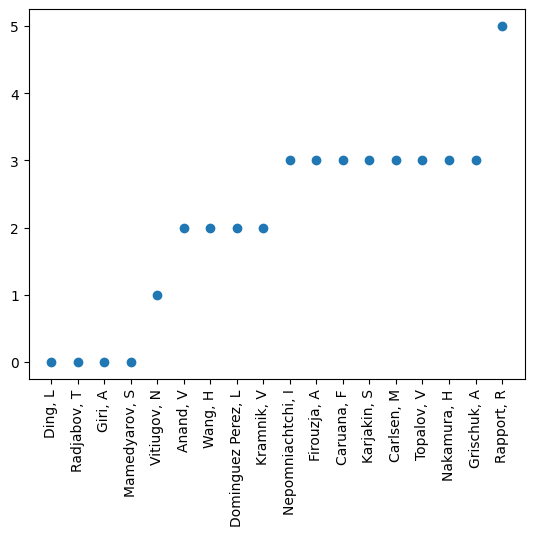

In [66]:
x = []
y = []
for i in dizionario_ordinato.keys():

    x.append(dizionario_ordinato[i])
    y.append(i)

plt.scatter(x=np.array(y), y=np.array(x))

#plt.bar(x=y, height=x)
plt.xticks(rotation=90)

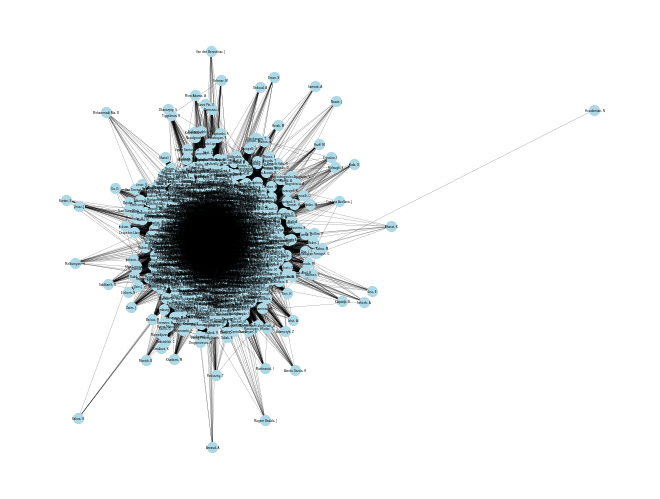

In [67]:
pos = nx.spring_layout(players_graph)
nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
plt.axis('off')
plt.show()

In [ ]:
#partition = best_partition(opening_graph)

'''cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in partitions.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]])'''

In [35]:
df = clean_dataframe(path)

In [36]:
df

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [37]:
df_senza_top20 = df

In [14]:
top_player_list = list(top_player_list)
top_player_list

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Aronian, I',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Vachier-Lagrave, M',
 'Firouzja, A']

In [38]:
for i in range(0,20):
    df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == i].index, inplace=True)

In [41]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[0]].index, inplace = True)

In [44]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[19]].index, inplace = True)
#df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[20]].index, inplace = True)

In [46]:

df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[19]].index, inplace = True)

In [47]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[0]].index, inplace = True)

In [49]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == 'Vachier Lagrave, M'].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == 'Vachier Lagrave, M'].index, inplace = True)

In [50]:
df_senza_top20

,White,Black,Result,Date,Opening
63,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [51]:
df_senza_top20=df_senza_top20.dropna()

In [52]:
df_senza_top20

,White,Black,Result,Date,Opening
84,"Butkiewicz, L","Malicka, M",½-½,"Dec 30, 2020","E36 Nimzo-Indian, classical, Noa variation, 5.a3"
85,"Ustianovich, N","Ochedzan, T",1-0,"Dec 30, 2020",E60 King's Indian defence
86,"Redzisz, M","Sanz Wawer, D",0-1,"Dec 30, 2020","B31 Sicilian, Nimzovich-Rossolimo attack (with..."
87,"Pasti, A","Szpar, M",½-½,"Dec 30, 2020",C11 French defence
88,"Fiedorek, M","Kopylov, M",½-½,"Dec 30, 2020","B42 Sicilian, Kan, 5.Bd3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [53]:
players_graph.remove_nodes_from(df_senza_top20['White'])
players_graph.remove_nodes_from(df_senza_top20['Black'])

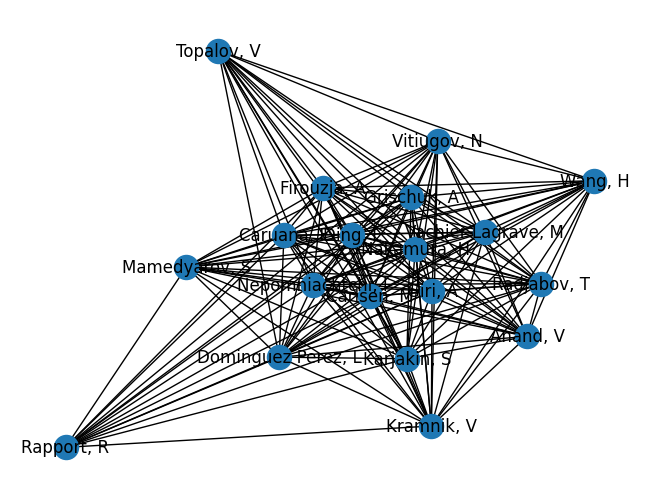

In [68]:
nx.draw(players_graph, with_labels=True)

In [70]:
len(players_graph.nodes)

19

/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_29160/3503813623.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_29160/3503813623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


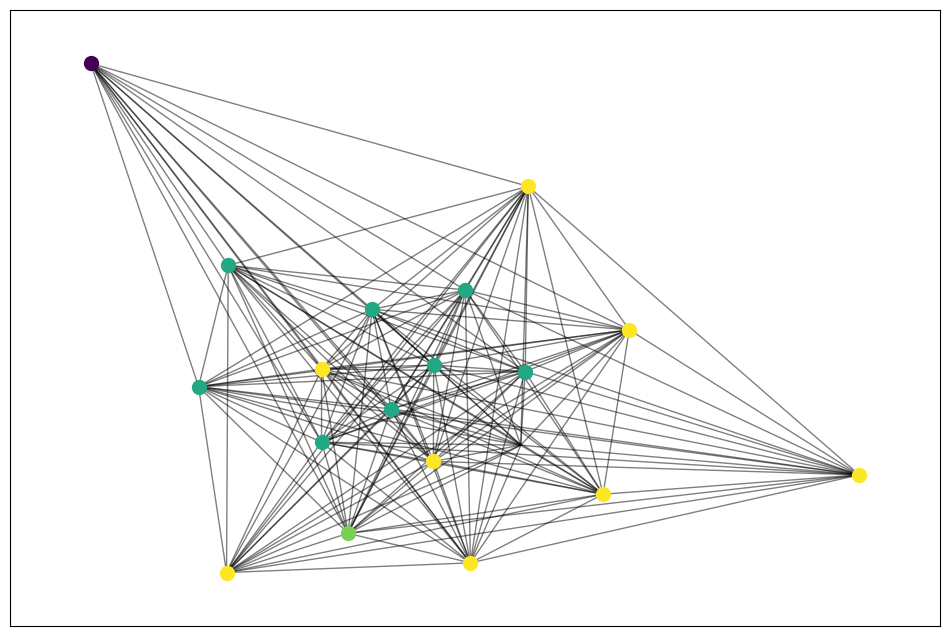

In [67]:

cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in dizionario_delle_comm_associate.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]], label=top_player_list)

In [58]:
len(players_graph.nodes)

19